In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r'C:\Users\balam\Guvi\Miniproject\providers_data.csv')
data.head()

,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577


In [10]:
data.tail()

,Provider_ID,Name,Type,Address,City,Contact
995,996,"Vasquez, Ruiz and Flowers",Restaurant,"84308 Justin Stravenue\nNew Amberside, NE 53447",Williamview,+1-319-378-7627x0682
996,997,Garza-Williams,Catering Service,"08864 Figueroa Radial Suite 948\nJennaberg, AZ...",East Rossside,001-924-441-3963x746
997,998,Novak Group,Grocery Store,"934 Zachary Run\nMelissamouth, WY 02729",Joshuastad,(903)642-1969x3300
998,999,Moody Ltd,Grocery Store,"17580 Ernest Hills\nLake Michaelmouth, OR 56416",Stevenchester,637.300.3664x4880
999,1000,Jenkins-Brooks,Restaurant,"53390 Evans Rapids Suite 982\nLake Meghan, MO ...",Brendantown,266-324-3458x95775


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider_ID  1000 non-null   int64 
 1   Name         1000 non-null   object
 2   Type         1000 non-null   object
 3   Address      1000 non-null   object
 4   City         1000 non-null   object
 5   Contact      1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [12]:
data.nunique()

Provider_ID    1000
Name            973
Type              4
Address        1000
City            963
Contact        1000
dtype: int64

In [13]:
data.isnull().sum()

Provider_ID    0
Name           0
Type           0
Address        0
City           0
Contact        0
dtype: int64

In [14]:
(data.isnull().sum()/(len(data)))*100

Provider_ID    0.0
Name           0.0
Type           0.0
Address        0.0
City           0.0
Contact        0.0
dtype: float64

In [17]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Type', 'Address', 'City', 'Contact'], dtype='object')
Numerical Variables:
['Provider_ID']


In [33]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Provider_ID,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Name,1000,973,Brown and Sons,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,1000,4,Supermarket,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,1000,1000,"74347 Christopher Extensions\nAndreamouth, OK ...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1000,963,New Carol,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contact,1000,1000,+1-600-220-0480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Provider_ID
Skew : 0.0


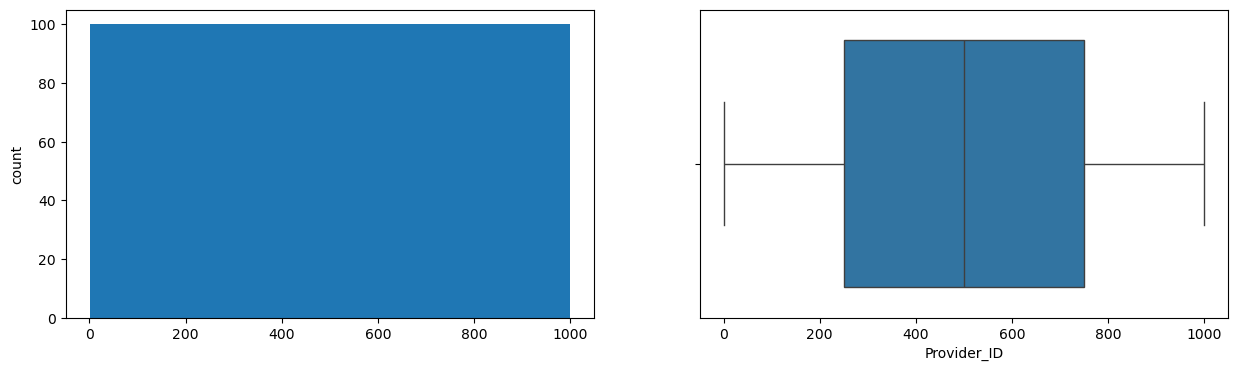

In [22]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

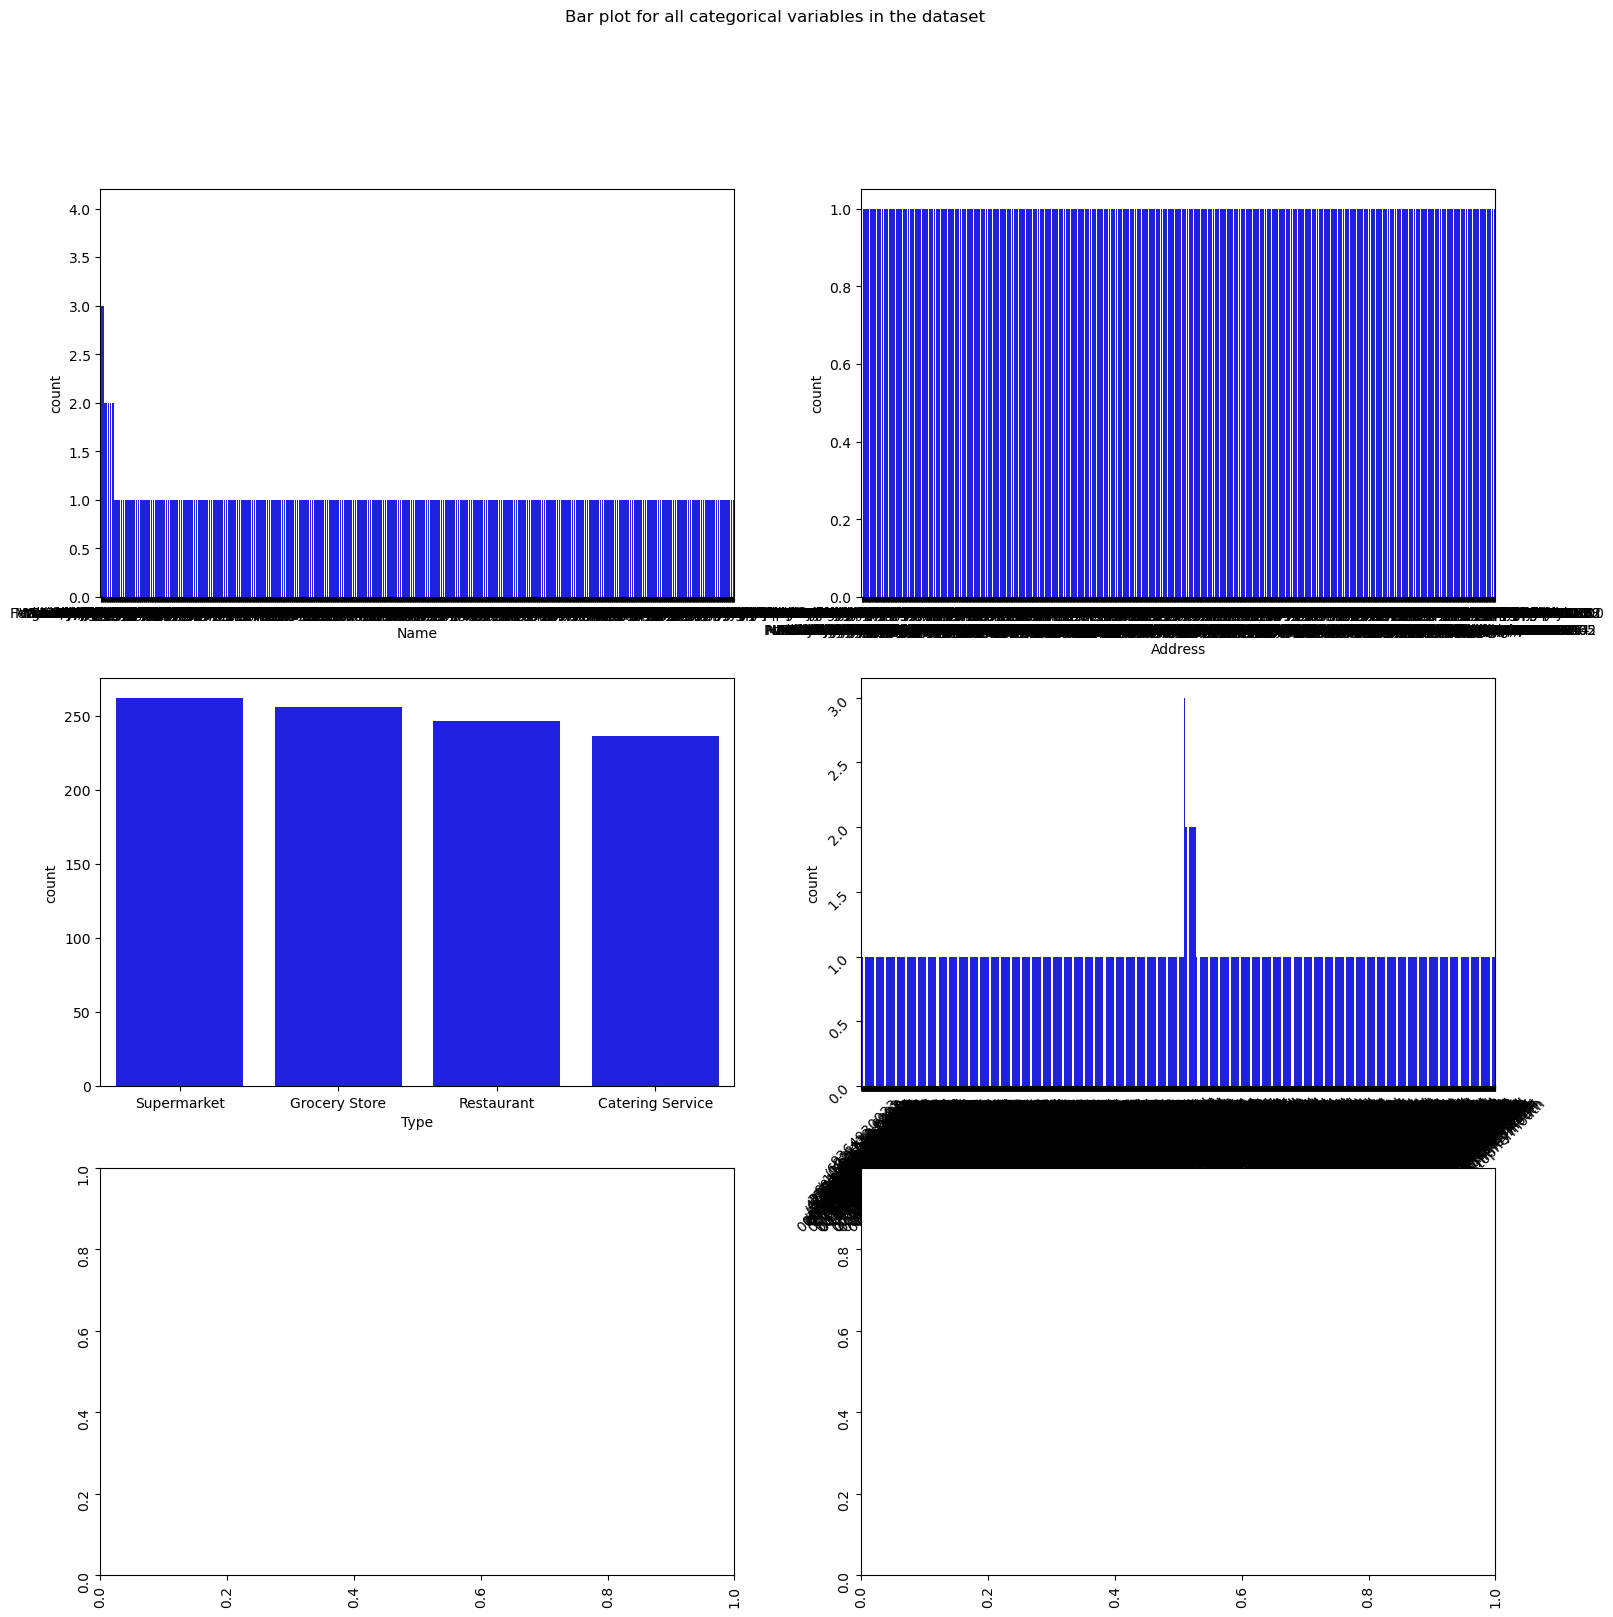

In [30]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Name', data = data, color = 'blue', 
              order = data['Name'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Address', data = data, color = 'blue', 
              order = data['Address'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Type', data = data, color = 'blue', 
              order = data['Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Contact', data = data, color = 'blue', 
              order = data['Contact'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'City', data = data, color = 'blue', 
              order = data['City'].value_counts().index);


axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);